# Using Graphical Misrepresentations to Mislead on Gun Violence

by Constance McCarney

This collection of graphs is inspired by an article on Vox.com by George Lopez which makes various arguments in favor of gun control using 17 data visualizations. The article is compelling and persuasive. Data gives a semblance of neutrality, an illusion of being neither for nor against any specific argument. But of course both sides of the gun control debate happily trot out charts and graphs intended to persuade the audience one way or the other. So the following visuals takes data on gun laws, deaths, suicides, etc. and creates arguments that contradict the idea that guns are a unique cause of unnecessary death and that we as a society can do something about it.

In [47]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import altair as alt

%autosave 0

Populating the interactive namespace from numpy and matplotlib


Autosave disabled


## 1. Guns are not the main method for attempting suicide

The purpose of this graph is to confuse the connection between suicides and guns. My previous work on this topic showed that guns are responsible for a greater proportion of suicides, but not suicide attempts. This means that when a person tries to commit suicide using a gun, it is much more likely that the person will die than had the attempt been made by say, poisoning. Using the same dataset from the CDC's WISQARS tool on self-inflicted fatal and non-fatal injuries in all US from 2001 to 2016, I can imply a very different conclusion. 

### Data

In [48]:
self = pd.read_csv('WISQARS.csv')
self.head()

,Year,Fatal,Intent,Injury,Counts,Population,Crude Rate,Age-Adjusted Rate
0,2001,1,Suicide,Cut/Pierce,458,284968955,0.16,0.160644
1,2002,1,Suicide,Cut/Pierce,566,287625193,0.20,0.195807
2,2003,1,Suicide,Cut/Pierce,571,290107933,0.20,0.194523
3,2004,1,Suicide,Cut/Pierce,590,292805298,0.20,0.197895
4,2005,1,Suicide,Cut/Pierce,590,295516599,0.20,0.196674


My goal with this dataset is to compare the different injury methods to one another, so my first grouping will eliminate the distinction between fatal and non-fatal attempts and the second grouping will average the results over the years. Using the raw number of attempts as the point of comparison will be easier for the audience to understand than by using the standardized rate per 100,000.

In [49]:
self1 = self.groupby(['Year','Injury']).sum().groupby('Injury').mean().reset_index()
self1.rename(columns={'Injury':'Method of Self Injury','Counts':'Number of Attempts'}, inplace=True)
self1

,Method of Self Injury,Fatal,Number of Attempts,Population,Crude Rate,Age-Adjusted Rate
0,Cut/Pierce,1.0,89366.5625,6.093377e+08,29.152500,29.724957
1,Firearm,1.0,22616.6875,6.093377e+08,7.405625,7.188271
2,Poisoning,1.0,247172.6875,6.093377e+08,81.088750,81.953195
3,Suffocation,1.0,11536.8125,6.093377e+08,3.761875,3.775513


### Graph and Interpretation

"This graph shows the average annual number of suicide attempts in the US from 2001 to 2016 by method of self-harm. Clearly, if we want to stop people trying to kill themselves, then we should be far more concerned with poisoning than with firearms."

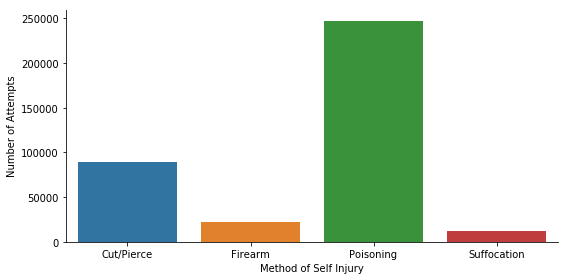

In [50]:
sns.factorplot(x='Method of Self Injury', y='Number of Attempts', data=self1, kind='bar',aspect=2)

The deception tactic here is in the background grouping of the data. By eliminating the distinction between fatal and non-fatal suicides attempts the graph implies that targeting firearms is less likely to affect suicides. But the distinction between fatal and non-fatal is crucial because the entire reason for targeting firearms is that they are more lethal than other methods of self-harm.

## 2. More gun laws don't lead to lower rates of gun deaths 

Previous analysis of CDC gun deaths data and tracking of gun laws in all 50 states done by Michael Siegel actually did show an inverse relationship between gun laws and gun deaths. However since the comparison is being made from state to state, we can make use of the very different population densities, crime rates, etc that naturally result in variation and outliers to suggest no relationship at all.

### Data

First the datasets need to be loaded in and combined. They can then be reduced down to only the essential columns, which are state based averages for gun laws and state based average gun death rate per 100,000 people. It is tempting to use raw numbers of gun deaths which would greatly impact the results because of the varying population sizes. But this is easily targeting when critiquing a graph on state to state comparisons. Using the rate will make the deception more convincing.

In [51]:
laws = pd.read_csv('State Gun Laws.csv')
deaths = pd.read_csv('CDC_GunDeaths.csv')

In [52]:
laws1 = laws[['state','year','lawtotal']]
laws1.columns = ['State', 'Year', 'Laws']
deaths1 = deaths.merge(laws1)
abbr = pd.read_csv('state_table.csv') #state name abbreviations
abbr = abbr[['name','abbreviation']]
deaths1 = deaths1.merge(abbr,left_on='State',right_on='name')

In [53]:
deaths2 = deaths1.groupby('abbreviation').mean().drop(['Crude Rate','Year','Population','Deaths'], axis=1)
deaths2.columns = ['Avg Gun Death Rate','Average Number of Laws']
deaths2.index.rename('State',inplace=True)

In [54]:
deaths2.describe()

,Avg Gun Death Rate,Average Number of Laws
count,50.000000,50.000000
mean,11.204354,24.981250
std,4.031447,23.775732
min,3.081583,3.375000
25%,8.657635,9.968750
50%,10.966331,15.312500
75%,14.440939,28.062500
max,19.114728,100.000000


In [55]:
deaths2.sort_values(by='Average Number of Laws')

,Avg Gun Death Rate,Average Number of Laws
State,,
VT,9.116153,3.3750
MT,15.930657,4.5000
AK,18.848418,5.0000
SD,9.555270,5.7500
ID,13.107533,5.8750
KY,13.713367,6.6875
MS,17.697853,7.4375
WY,16.330768,9.0625
LA,19.114728,9.0625


In [56]:
deaths3 = deaths2[(deaths2['Avg Gun Death Rate'] > 8) & (deaths2['Avg Gun Death Rate'] < 11) & \
                  (deaths2['Average Number of Laws'] < 30)].reset_index()

In [57]:
deaths4 = deaths2[(deaths2['Avg Gun Death Rate'] > 8) & (deaths2['Avg Gun Death Rate'] < 11)]
deaths4

,Avg Gun Death Rate,Average Number of Laws
State,,
CA,8.542897,94.8125
DE,9.674386,28.2500
IL,8.894086,61.8750
KS,10.950349,9.5000
MD,10.967353,56.4375
ME,8.269171,10.2500
ND,9.500131,12.6250
NE,8.254284,22.0625
OH,10.002347,16.8750


### Graphs and Interpretation

"Despite dramatic changes in the average number of laws in a state, the gun death rate remains consistent. More laws will not change the gun death rates."

This graph is pulling out a selective range of data to provide the best contrast between the rates of gun deaths and the numbers of laws. In addition, by using the same axis, any significant variation in the gun death rate is completely swamped by the large number of laws.

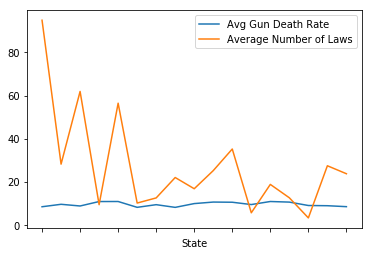

In [58]:
deaths4.plot()

## 3. More gun owners does not mean more suicides

In an earlier piece, using the data from the CDC and Kalesan, et al I demonstrated that higher rates of gun ownership do in fact correlate with more suicides by gun, whereas there is no relationship between the ownership rates and rates of suicide by non-firearm means. But a more selective look at the data can reveal a different scenario.

### Data

In this data, I am looking to collect as many data points as possible so I can eventually narrow in on a middle zone where suicide rates don't appear to change. I'm also making sure I'm looking at the overall suicide rates, not divided by method of suicide so that I introduce more noise.

In [59]:
own = pd.read_csv('State Gun Ownership Rate 2013.csv')
suicides = pd.read_csv('CDC_Suicides.csv')

In [60]:
own.drop(['Year','Population'],axis=1, inplace=True)
suicides1 = suicides.merge(own, how='left')
suicides1.head()

,State,Year,Population,Fdeaths,FCrude Rate,FAge Adjusted Rate,NFDeaths,NFCrude Rate,NFAge Adjusted Rate,Ownership Ratio,2001 Low,2001 High
0,Alabama,2001,4467634,387,8.66230,8.56569,125,2.79790,2.81160,0.489,0,1
1,Alabama,2002,4480089,381,8.50430,8.45582,133,2.96869,3.01729,0.489,0,1
2,Alabama,2003,4503491,399,8.85979,8.71749,122,2.70901,2.73791,0.489,0,1
3,Alabama,2004,4530729,375,8.27681,8.02271,166,3.66387,3.71584,0.489,0,1
4,Alabama,2005,4569805,369,8.07474,7.84921,166,3.63254,3.68095,0.489,0,1


In [61]:
own.describe()

,Ownership Ratio,2001 Low,2001 High
count,51.000000,51.000000,51.000000
mean,0.324980,0.117647,0.294118
std,0.129952,0.325396,0.460179
min,0.052000,0.000000,0.000000
25%,0.260500,0.000000,0.000000
50%,0.322000,0.000000,0.000000
75%,0.409000,0.000000,1.000000
max,0.617000,1.000000,1.000000


In [62]:
suicides1['Suicide Rate'] = suicides1['FAge Adjusted Rate'] + suicides1['NFAge Adjusted Rate']
suicides1['Suicides'] = suicides1['Fdeaths'] + suicides1['NFDeaths']

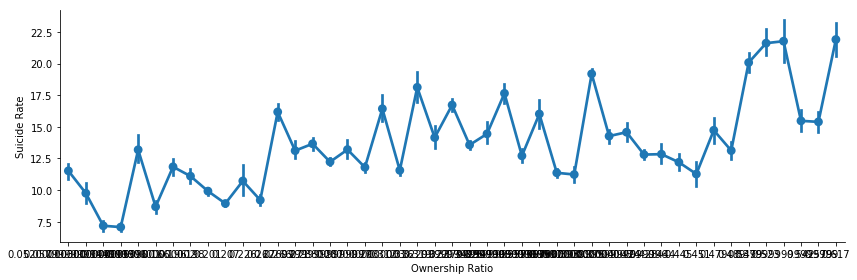

In [63]:
sns.factorplot(x='Ownership Ratio', y='Suicide Rate', kind='point', data=suicides1, aspect=3)

In [64]:
suicides2 = suicides1[(suicides1['Ownership Ratio'] > .27) & (suicides1['Ownership Ratio'] < .35)] 

In [65]:
len(suicides2.groupby('State').mean())

18

### Graphs and Interpretation

"This graph shows that there is suicide rates per 100,000 vary greatly even among similar rates of gun ownership. Restricting gun ownership would not affect suicide rates."

Here you can see that I've narrowed in on a small ban of ownership ratios that really only represents about 18 states. The truncated axis further helps exagerate the differences in the rates so that the volatility looks more extreme than it necessarily is. Additional work will need to be done to clean up the axis data and provide more overall information.

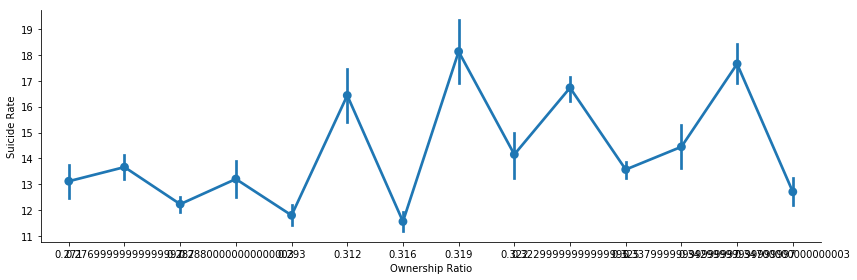

In [66]:
sns.factorplot(x='Ownership Ratio', y='Suicide Rate', kind='point', data=suicides2, aspect=3)

## References

CDC National Center for Health Statistics (NCHS). Underlying Cause of Death 1999-2016. Saved request: https://wonder.cdc.gov/controller/saved/D76/D35F899

CDC National Center for Injury Prevention and Control. WISQARS™ (Web-based Injury Statistics Query and Reporting System). https://www.cdc.gov/injury/wisqars/index.html

Kalesan B, Villarreal MD, Keyes KM, et al Gun ownership and social gun culture Injury Prevention 2016;22:216-220. http://dx.doi.org/10.1136/injuryprev-2015-041586

Lopez, George. "America’s unique gun violence problem, explained in 17 maps and charts." Vox.com. Accessed May 5, 2018.
https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts

Miller, Matthew, M.D., Sc.D., and David Hemenway, Ph.D. Guns and Suicide in the United States. N Engl J Med 2008; 359:989-991. September 4, 2008. DOI: 10.1056/NEJMp0805923

Siegel, Michael. State Firearm Laws. State Laws by Year. Accessed May 5, 2018. https://www.statefirearmlaws.org/table.html
CDC National Center for Health Statistics (NCHS). Underlying Cause of Death 1999-2016. Saved request: https://wonder.cdc.gov/controller/saved/D76/D35F901
